In [1]:
#Search for specific terms within a corpus of texts
#texts used are txt files of pubmed "Disorders of Consciousness" studies
#2239 documents considered relevant after TM (references already removed)
#Outputs: bar graph of all dictionary terms + BoW of corpus
#Outputs: term document matrix as a csv in downloads

In [2]:
import functions

In [3]:
dict_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/full_dictionary.txt"
corpus_dir = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/separated_pdfs"
replacement_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/replacement.csv"

In [4]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [7]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [8]:
print("We have a total of {} articles".format(len(doc_list)))

We have a total of 2239 articles


In [9]:
dictionary = functions.os_level.makedict(dict_path)

In [10]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [11]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [12]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [13]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('cingulate cortex', 2246), ('thalamus', 1993), ('cerebellum', 1960), ('insular cortex', 1354), ('hippocampus', 1160), ('amygdala', 726), ('cuneus', 660), ('precuneus', 598), ('default mode network', 558), ('anterior cingulate', 445), ('cerebral cortex', 402), ('crus', 385), ('dorsolateral prefrontal cortex', 372), ('posterior cingulate', 291), ('premotor cortex', 283), ('caudate nucleus', 259), ('superior temporal gyrus', 191), ('parahippocampus', 184), ('orbitofrontal', 157), ('inferior frontal gyrus', 140), ('supplementary motor cortex', 130), ('inferior parietal lobule', 126), ('precentral gyrus', 122), ('pallidum', 116), ('angular gyrus', 112), ('fusiform gyrus', 106), ('postcentral gyrus', 105), ('primary motor cortex', 103), ('middle temporal gyrus', 102), ('primary auditory cortex', 98), ('middle frontal gyrus', 98), ('superior frontal', 81), ('primary visual cortex', 70), ('supramarginal gyrus', 70), ('vermis', 67), ('inferior temporal gyrus', 67), ('superior parieta

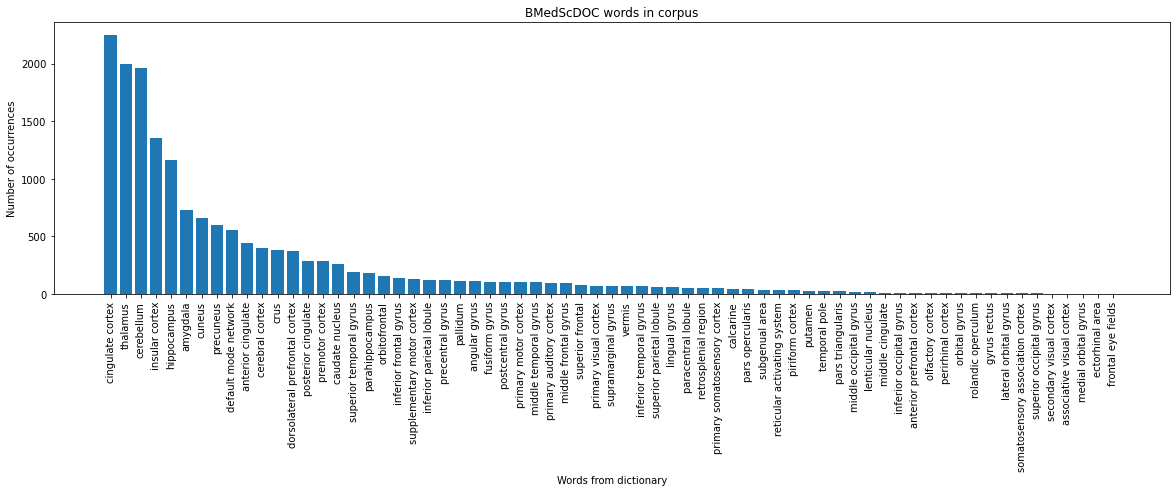

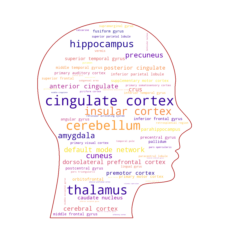

In [14]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)